`63070501061 S.RAKNA`

# Principal Component Analysis
Use the `PCA Examples.ipynb` for the following:

> 15 points. 1 hour.
### 1. Using the **Wine dataset**, use PCA to reduce it to 2 PCA features.

#### 1.1 Visualize the first 2 columns as a scatter plot using all (100%) of the data.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
winedata = load_wine()

X = winedata['data'] # type: ignore
y = winedata['target'] # type: ignore
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target Output: \n", y) #y has 3 classes
print("Feature Names: \n", winedata["feature_names"]) # type: ignore
print("Target Names: \n", winedata["target_names"]) # type: ignore

X shape: (178, 13)
y shape: (178,)
Target Output: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Feature Names: 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: 
 ['class_0' 'class_1' 'class_2']


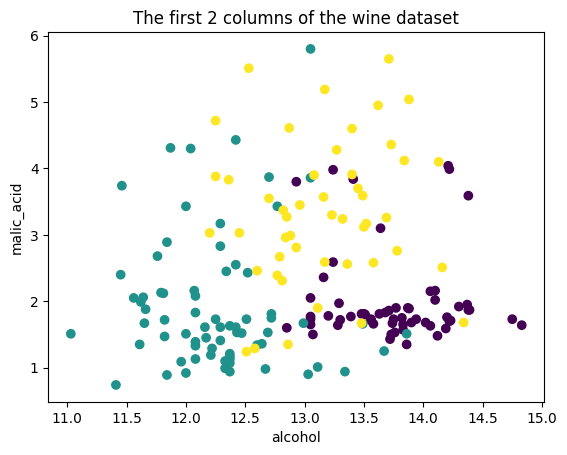

In [3]:
# Visualize the first 2 columns as a scatter plot using all (100%) of the data.
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(winedata["feature_names"][0]) # type: ignore
plt.ylabel(winedata["feature_names"][1]) # type: ignore
plt.title("The first 2 columns of the wine dataset")
plt.show()

#### 1.2 In another graph visualize the scatter plot for the 2 PCA features also using all the data.

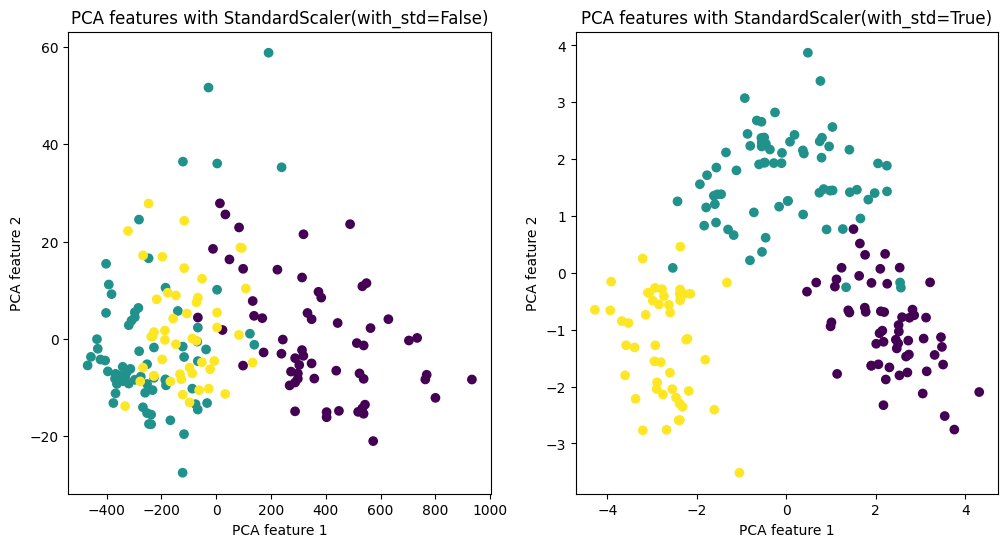

In [4]:
# In another graph visualize the scatter plot for the 2 PCA features also using all the data.

# subplot without/with StandardScaler
plt.figure(figsize=(12, 6))
for i, with_std in enumerate([False, True]):
    plt.subplot(1, 2, i + 1)
    pipe = Pipeline([('scaler', StandardScaler(with_std=with_std)),
                     ('pca', PCA(n_components=2))])
    X_pca = pipe.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
    plt.xlabel("PCA feature 1")
    plt.ylabel("PCA feature 2")
    plt.title("PCA features with StandardScaler(with_std={})".format(with_std))
plt.show()

#### 1.3 What % of information (“explained variance”) is preserved in the 2 PCA features?

In [5]:
# Explained Variance in the 2 PCA features
pipe = Pipeline([('scaler', StandardScaler()),
                  ('pca', PCA(n_components=2))])
X_pca = pipe.fit_transform(X)
print("Explained Variance in the 2 PCA features: ", pipe.named_steps['pca'].explained_variance_ratio_)
print("Sum of Explained Variance in the 2 PCA features: ", sum(pipe.named_steps['pca'].explained_variance_ratio_))

Explained Variance in the 2 PCA features:  [0.36198848 0.1920749 ]
Sum of Explained Variance in the 2 PCA features:  0.5540633835693528


> 10 points. 1 hour.
### 2. Use <u>25% for testing</u> for the **Wine dataset**. 
- Plot a graph of the accuracy of the samples when using <u>1, 2, 3, ..., 13 PCA features</u> 
- along with showing how much % variance is preserved (p%) for each? 
- Use logistic regression.


In [6]:
# split 75% training and 25% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Train a Logistic Regression model on the training data using the 1, 2, ..., 12, 13 PCA features with p%.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Number of PCA features\tAccuracy\tExplained Variance")
for p in range(1, 14):
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=p)),
                     ('logistic', LogisticRegression())])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("{}\t\t\t{:.2f}\t\t{}".format(p, accuracy, sum(pipe.named_steps['pca'].explained_variance_ratio_)))

Number of PCA features	Accuracy	Explained Variance
1			0.82		0.3639525045577924
2			0.96		0.5501298349276386
3			0.96		0.6687765708188679
4			0.96		0.7425110842318718
5			1.00		0.8109012652153167
6			0.96		0.856280182274702
7			1.00		0.8937072223609828
8			0.98		0.9202645085514121
9			0.98		0.9431916150227021
10			0.98		0.962441647123733
11			0.98		0.9797917985904487
12			0.98		0.9926480228842449
13			0.98		0.9999999999999999


> 15 points. 2 hours.
### 2. Decision boundary. 
- Plot the decision boundary for PCA-reduced 2 dimensions of the wine dataset. 
- Use ML Perceptron in https://python-course.eu/machine-learning/neural-networks-with-scikit.php with 2 hidden layers.

In [8]:
# Reducing the number of features to 2
pipe = Pipeline([('scaler', StandardScaler()),
                  ('pca', PCA(n_components=2))])
X_pca = pipe.fit_transform(X)

# split 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(4, 4),
    max_iter=1000,
    alpha=0.0001,
    solver='sgd',
    verbose=0, # type: ignore
    random_state=21,
    tol=0.000000001
)

mlp.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000, random_state=21,
              solver='sgd', tol=1e-09, verbose=0)

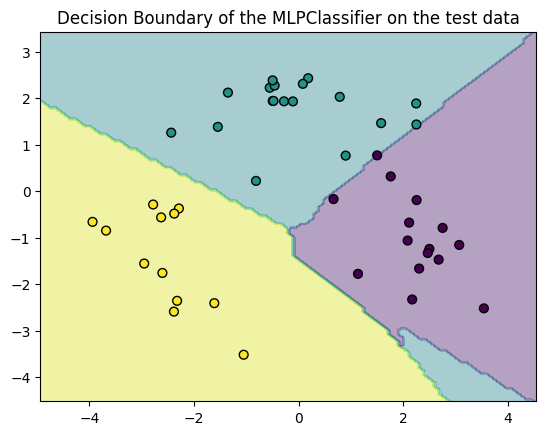

In [10]:
# Plot the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

f, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(mlp, X_test, ax=ax, alpha=0.4, response_method='predict')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test , s=40, edgecolor="k")
ax.set_title("Decision Boundary of the MLPClassifier on the test data")
plt.show()